# Genre space mapping

Load genrespace.tsv and use MDS to make it a map.

In [30]:
# Let's start with some standard imports.

import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np
%matplotlib inline
from sklearn.manifold import MDS
from matplotlib import cm

In [61]:
gen = pd.read_csv('genrespace.tsv', sep = '\t')
gen.head()

,testype,name1,name2,meandate1,meandate2,acc1,acc2,alienacc1,alienacc2,spearman,spear1on2,spear2on1,loss,loss1on2,loss2on1
0,sfnojuv1800to1899|self,sfnojuv1800to1899v0,sfnojuv1800to1899v0,1875.073333,1875.073333,0.866667,0.866667,0.993333,0.993333,1.255341,1.255341,1.255341,-0.126667,-0.126667,-0.126667
1,sfnojuv1800to1899|self,sfnojuv1800to1899v0,sfnojuv1800to1899v1,1875.073333,1874.946667,0.866667,0.886667,0.973333,0.986667,1.172028,1.235352,1.108704,-0.103333,-0.100000,-0.106667
2,sfnojuv1800to1899|self,sfnojuv1800to1899v0,sfnojuv1800to1899v2,1875.073333,1875.600000,0.866667,0.886667,0.966667,0.980000,1.170712,1.269208,1.072216,-0.096667,-0.093333,-0.100000
3,sfnojuv1800to1899|self,sfnojuv1800to1899v0,sfnojuv1800to1899v3,1875.073333,1874.513333,0.866667,0.900000,0.973333,0.960000,1.215405,1.340231,1.090580,-0.083333,-0.060000,-0.106667
4,sfnojuv1800to1899|self,sfnojuv1800to1899v0,sfnojuv1800to1899v4,1875.073333,1872.986667,0.866667,0.873333,0.980000,0.973333,1.067337,1.074531,1.060143,-0.106667,-0.100000,-0.113333


In [71]:
np.mean(gen.alienacc2[gen.testype=='fantasynojuv2000to2010|sfnojuv2000to2010'])

0.8901333333333602

In [62]:
tests = set(gen.testype)
names = set()
for t in tests:
    parts = t.split('|')
    names.add(parts[0])
    if not parts[1] == 'self':
        names.add(parts[1])

print(gen.shape)
print(names)

(8464, 15)
{'scarborough_random', 'fantasynojuv1950to1969', 'sfnojuv1950to1969', 'sfnojuv1900to1919', 'sfnojuv2000to2010', 'sfnojuv1980to1989', 'sfnojuv1970to1979', 'fantasynojuv1990to1999', 'bailey_random', 'fantasynojuv1900to1919', 'sfnojuv1800to1899', 'fantasynojuv1800to1899', 'sfnojuv1990to1999', 'fantasynojuv2000to2010', 'fantasynojuv1980to1989', 'fantasynojuv1970to1979', 'sfnojuv1920to1949', 'fantasynojuv1920to1949'}


In [63]:
selfmeans = dict()
for n in names:
    selfname = n + '|self'
    if selfname in tests:
        themean = np.mean(gen.spearman[gen.testype == selfname])
        selfmeans[n] = themean
    else:
        print(selfname)

names = [x for x in selfmeans.keys()]

In [64]:
gdict = dict()
for g in names:
    gdict[g] = dict()

def comparison(a, b, df, selfmeans):
    name1 = a + '|' + b
    name2 = b + '|' + a
    cross = df[(df.testype == name1) | (df.testype == name2)]
    crossmean = np.mean(cross.spearman)
    maxself = max(selfmeans[a], selfmeans[b])
    return 1.05 - (crossmean/maxself)
    
for g1 in names:
    for g2 in names:
        if g1 == g2:
            gdict[g1][g2] = 0
            continue
            
        else:
            gdict[g1][g2] = comparison(g1, g2, gen, selfmeans)

distmat = pd.DataFrame(gdict)
distmat

,bailey_random,fantasynojuv1800to1899,fantasynojuv1900to1919,fantasynojuv1920to1949,fantasynojuv1950to1969,fantasynojuv1970to1979,fantasynojuv1980to1989,fantasynojuv1990to1999,fantasynojuv2000to2010,scarborough_random,sfnojuv1800to1899,sfnojuv1900to1919,sfnojuv1920to1949,sfnojuv1950to1969,sfnojuv1970to1979,sfnojuv1980to1989,sfnojuv1990to1999,sfnojuv2000to2010
bailey_random,0.000000,0.640636,0.632143,0.394812,0.387703,0.357316,0.106548,0.165938,0.145433,0.050000,0.683951,0.663506,0.425541,0.510882,0.495177,0.311193,0.282007,0.267738
fantasynojuv1800to1899,0.640636,0.000000,0.191140,0.367002,0.479025,0.502914,0.454102,0.523756,0.569747,0.640636,0.215329,0.602165,0.577972,0.748784,0.696594,0.722721,0.614687,0.689098
fantasynojuv1900to1919,0.632143,0.191140,0.000000,0.273377,0.298454,0.496985,0.467712,0.565796,0.573950,0.632143,0.032239,0.374895,0.353477,0.536974,0.657273,0.574969,0.447545,0.607169
fantasynojuv1920to1949,0.394812,0.367002,0.273377,0.000000,0.274993,0.211203,0.181012,0.212502,0.294182,0.394812,0.318130,0.531168,0.305340,0.546876,0.555969,0.505796,0.341860,0.442993
fantasynojuv1950to1969,0.387703,0.479025,0.298454,0.274993,0.000000,0.247643,0.229550,0.326228,0.319630,0.387703,0.298356,0.543882,0.294416,0.369683,0.371965,0.323881,0.175917,0.306140
fantasynojuv1970to1979,0.357316,0.502914,0.496985,0.211203,0.247643,0.000000,0.130733,0.152035,0.262721,0.357316,0.385001,0.569074,0.389377,0.536175,0.362552,0.487975,0.306159,0.366506
fantasynojuv1980to1989,0.106548,0.454102,0.467712,0.181012,0.229550,0.130733,0.000000,0.066868,-0.012001,0.106548,0.531553,0.642163,0.335434,0.459990,0.427511,0.310267,0.201714,0.088441
fantasynojuv1990to1999,0.165938,0.523756,0.565796,0.212502,0.326228,0.152035,0.066868,0.000000,0.057050,0.165938,0.598744,0.653604,0.430478,0.570808,0.502730,0.459789,0.254824,0.241563
fantasynojuv2000to2010,0.145433,0.569747,0.573950,0.294182,0.319630,0.262721,-0.012001,0.057050,0.000000,0.145433,0.618030,0.671793,0.387344,0.550627,0.530521,0.327725,0.248268,0.248777
scarborough_random,0.050000,0.640636,0.632143,0.394812,0.387703,0.357316,0.106548,0.165938,0.145433,0.000000,0.683951,0.663506,0.425541,0.510882,0.495177,0.311193,0.282007,0.267738


In [67]:
distmat.to_csv('genredistancematrix.csv')

In [65]:
scaler = MDS(metric = True, dissimilarity = 'precomputed')
coordinates = scaler.fit_transform(distmat)

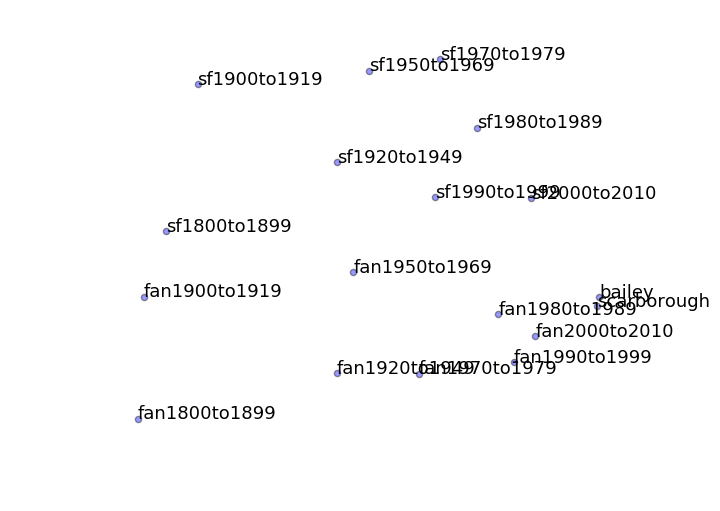

In [66]:
fig, ax = plt.subplots(figsize = (8, 6))
genres = distmat.index.tolist()
colors=np.linspace(0, 1, 7)
ax.scatter(coordinates[ :, 0], coordinates[ : , 1], alpha = 0.4)
#ax.set_xlim((-0.65, 1.35))
# ax.set_ylim((-1.9, 2.1))
for i in range(len(genres)):
    thisx = coordinates[i, 0]
    thisy = coordinates[i, 1]
    name = genres[i].replace('nojuv', '').replace('tasy', '').replace('_random', '')
    ax.annotate(name, (thisx, thisy), fontsize = 13)
plt.axis('off')
plt.savefig('new2detectiveMDS.png', bbox_inches = 'tight')
plt.show()